### Задание1. 

Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.


#### импортируем необходимые библиотеки:

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%run myalglib/GradientDescentsCalc import GradientDescentsCalc
%matplotlib inline

#### зададим размерность генерируемого массива:

In [2]:
n_features = 2
n_samples = 1000

#### сгенерируем набор данных:

In [3]:
data, target, coef = datasets.make_regression(n_samples = n_samples, 
                                              n_features = n_features, 
                                              n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, 
                                              coef = True, 
                                              random_state = 2)

#### закрепим случайную выборку

In [4]:
np.random.seed(1234)

####  Создадим экземпляр самостоятельно разработанного класса 

` GradientDescentsCalc` 

In [5]:
a = GradientDescentsCalc(data, target)

#### Градиентный спуск

In [6]:
gd_w_list, gd_errors = a.gd()

#### Стохастический градиентный спуск

In [7]:
sgd_w_list, sgd_errors= a.sgd()

 #### Визуализируем полученный результат:

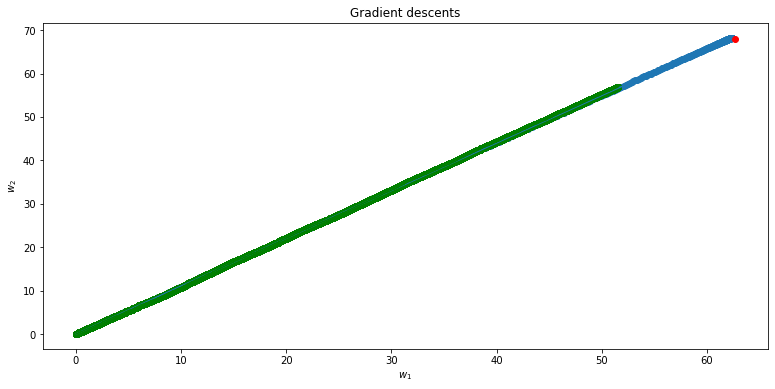

In [8]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descents')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(gd_w_list[:, 0], gd_w_list[:, 1])
plt.scatter(sgd_w_list[:, 0], sgd_w_list[:, 1], c='g')
plt.scatter(coef[0], coef[1], c='r')

plt.plot(gd_w_list[:, 0], gd_w_list[:, 1])
plt.plot(sgd_w_list[:, 0], sgd_w_list[:, 1], c='g')


plt.show()

Text(0, 0.5, 'MSE')

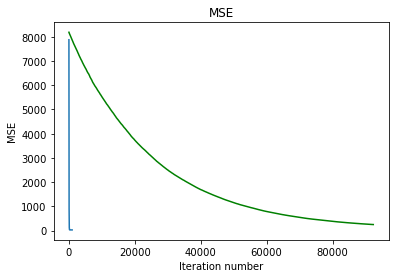

In [9]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gd_errors)), gd_errors)
plt.plot(range(len(sgd_errors)), sgd_errors, c='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

<font color="brown">
    <p>
        <strong>
Выводы:

То ли я где-то сильно накосячил, то ли градиентный спуск отчего-то сильно эфективнее стохастического градиентного спуска...
         </strong>
     </p>
</font>

### Задание 2.

Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
class GradientDescentsCalc_with_l2(GradientDescentsCalc):
    def mserror(self, x, w, y_pred):
        # рассчёт среднеквадратичной ошибки
        y = x.dot(w)
        return ((sum((y - y_pred) ** 2)) / len(y)) + w*w.T
    

In [11]:
b = GradientDescentsCalc_with_l2(data, target)

In [12]:
gd_w_list2, gd_errors2 = b.gd()

In [13]:
sgd_w_list2, sgd_errors2= b.sgd()

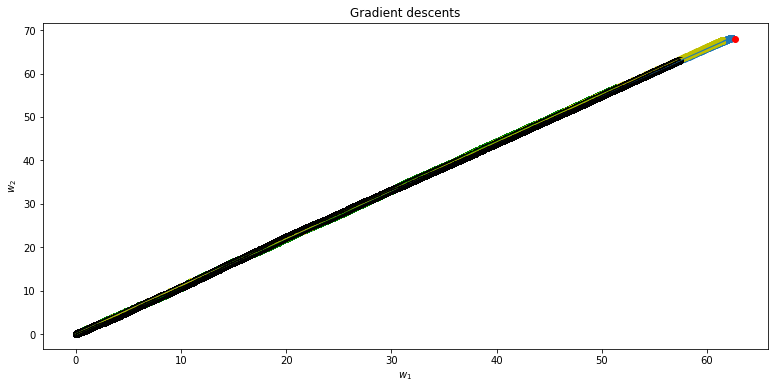

In [14]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descents')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(gd_w_list[:, 0], gd_w_list[:, 1])
plt.scatter(sgd_w_list[:, 0], sgd_w_list[:, 1], color='g')
plt.scatter(gd_w_list2[:, 0], gd_w_list2[:, 1], c='y')
plt.scatter(sgd_w_list2[:, 0], sgd_w_list2[:, 1], c='black')
plt.scatter(coef[0], coef[1], c='r')

plt.plot(gd_w_list[:, 0], gd_w_list[:, 1])
plt.plot(sgd_w_list[:, 0], sgd_w_list[:, 1], c='g')
plt.plot(gd_w_list2[:, 0], gd_w_list2[:, 1], c='y')
plt.plot(sgd_w_list2[:, 0], sgd_w_list2[:, 1], c='black')


plt.show()

Text(0, 0.5, 'MSE')

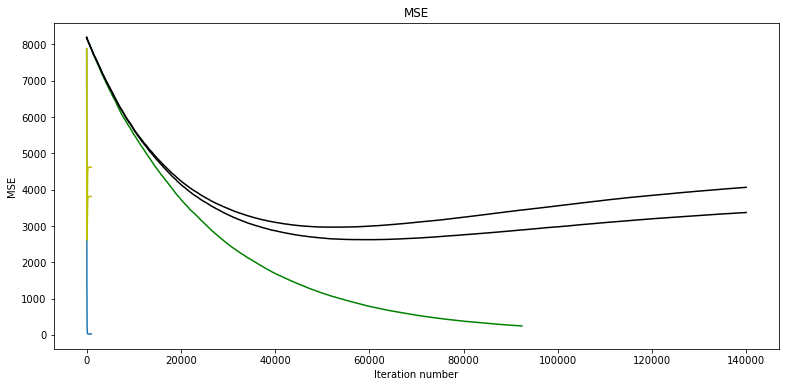

In [15]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(gd_errors)), gd_errors)
plt.plot(range(len(sgd_errors)), sgd_errors, c='g')
plt.plot(range(len(gd_errors2)), gd_errors2, c='y')
plt.plot(range(len(sgd_errors2)), sgd_errors2, c='black')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

<font color="brown">
    <p>
        <strong>
Выводы:

Опять же, мистика. С регулязационной поправкой L2 вышло как-то... хуже, что ли? Гораздо больше итераций при том же, в общем-то результате. Или я что-то не понял. MSE GD  так вообще ушла куда-то не туда. Буду рад, если вы сможете объяснить.
     </p>
</font>